## Important libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Problem Statement 

In [2]:
# To predict the charges of insurance 

## Data Gathering 

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## EDA 

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

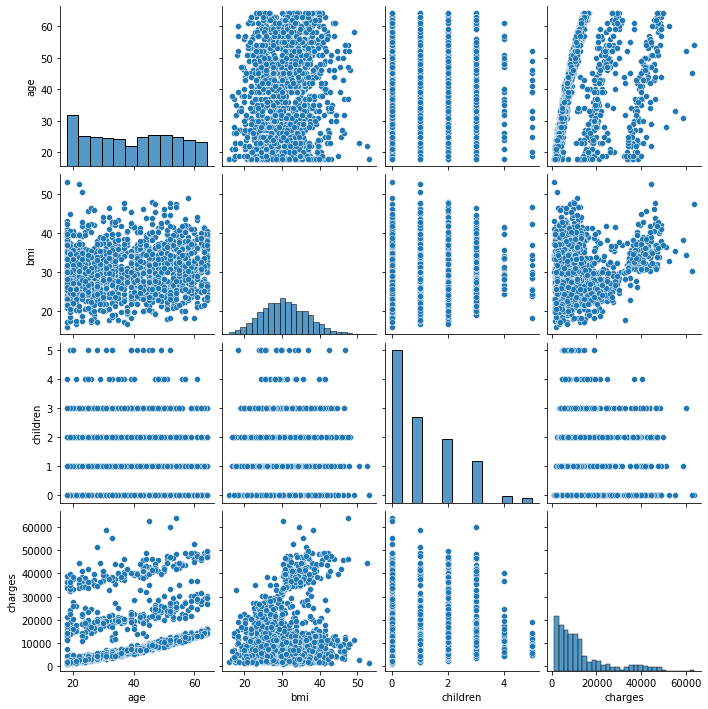

In [7]:
sns.pairplot(df)

<AxesSubplot:xlabel='age', ylabel='charges'>

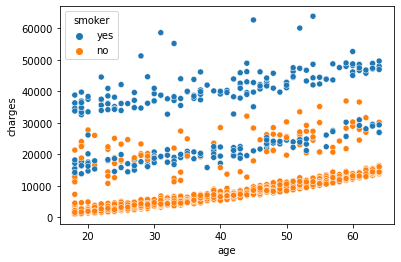

In [8]:
sns.scatterplot(x=df["age"], y=df["charges"],  hue=df["smoker"])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

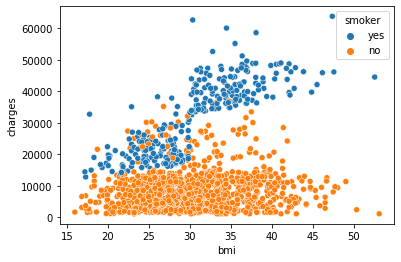

In [9]:
sns.scatterplot(x=df["bmi"], y=df["charges"], hue = df["smoker"])

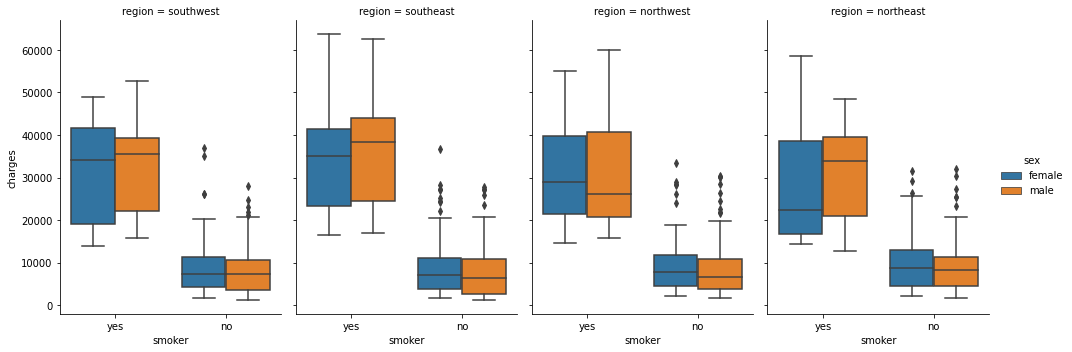

In [10]:
sns.catplot(x='smoker', y='charges', hue='sex',
            col='region', aspect=.7,
            kind='box', data=df)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

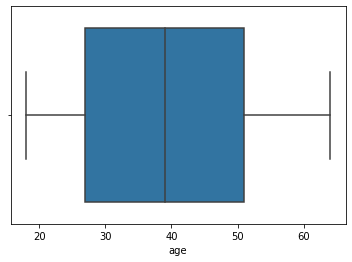

In [11]:
sns.boxplot(df["age"])

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

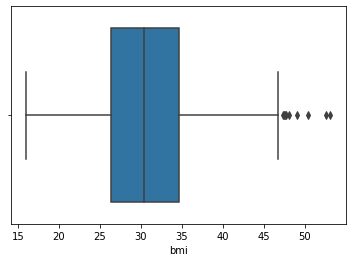

In [12]:
sns.boxplot(df["bmi"])

In [13]:
q1 = df["bmi"].quantile(0.25)
q2 = df["bmi"].quantile(0.50)
q3 = df["bmi"].quantile(0.75)
print(f"Q1=={q1}, Q2=={q2}, Q3=={q3}")

IQR = q3-q1
print(IQR)

lower_quartile = q1 - (1.5*IQR)
print("lower_quartile ==", lower_quartile)
upper_quartile = q3+(1.5*IQR)
print("Üpper Quartile ==",upper_quartile)

Q1==26.29625, Q2==30.4, Q3==34.69375
8.3975
lower_quartile == 13.7
Üpper Quartile == 47.290000000000006


In [14]:
df.loc[df["bmi"]>upper_quartile, "bmi"]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [15]:
bmi_mean = df["bmi"].mean()

In [16]:
bmi_mean

30.66339686098655

In [17]:
df.loc[df["bmi"]>upper_quartile, "bmi"]=bmi_mean

In [18]:
df.loc[df["bmi"]>upper_quartile, "bmi"]

Series([], Name: bmi, dtype: float64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [21]:
df["sex"].replace({"female":0, "male":1}, inplace=True)

In [22]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [23]:
df["smoker"].replace({"no":0, "yes":1}, inplace=True)

In [24]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [25]:
df["region"].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [26]:
df["region"].replace({'southeast':1 , 'southwest':0 , 'northwest': 2, 'northeast': 3}, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


<AxesSubplot:>

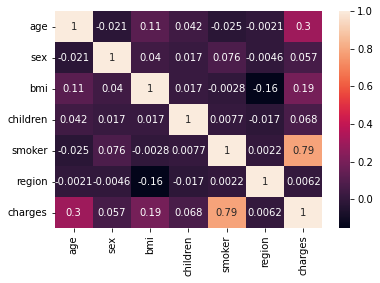

In [29]:
sns.heatmap(df.corr(), annot=True)

In [30]:
x= df.drop("charges", axis=1)
y=df["charges"]

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
arr = mutual_info_regression(x,y)


In [33]:
arr

array([1.50003284, 0.17665987, 0.0724382 , 0.16170686, 0.36917105,
       0.07699747])

In [34]:
s1 = pd.Series(arr,index=x.columns)
s1.sort_values()

bmi         0.072438
region      0.076997
children    0.161707
sex         0.176660
smoker      0.369171
age         1.500033
dtype: float64

<AxesSubplot:>

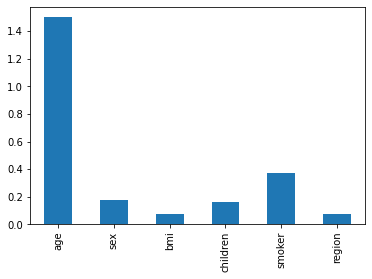

In [35]:
s1.plot(kind="bar")

In [36]:
from skfeature.function.similarity_based import fisher_score

In [38]:
array = fisher_score.fisher_score(x.values,y)
print(array)

[0 1 2 3 4 5]


In [39]:
x.shape

(1338, 6)

<AxesSubplot:>

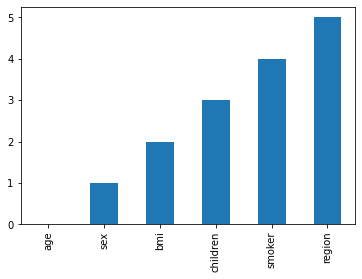

In [40]:
s1 = pd.Series(array, index=x.columns)
s1.sort_values().plot(kind="bar")

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=13)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

## Model Evoluation

In [43]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
test_pred = model.predict(x_test)

In [45]:
mse = mean_squared_error(y_test, test_pred)
print(f"mse=={mse}")
r_sq = r2_score(y_test, test_pred)
print(f"R2Score is == {r_sq}")
mae = mean_absolute_error(y_test, test_pred)
print(f"Mae == {mae}")

mse==29244244.664775614
R2Score is == 0.7865251559863318
Mae == 3853.646085709628


In [46]:
train_pred = model.predict(x_train)

In [47]:
mse = mean_squared_error(y_train, train_pred)
print(f"mse=={mse}")
r_sq = r2_score(y_train, train_pred)
print(f"R2Score is == {r_sq}")
mae = mean_absolute_error(y_train, train_pred)
print(f"Mae == {mae}")

mse==39336985.615575
R2Score is == 0.736066316151903
Mae == 4421.247538350401


## User Test Function

In [55]:
def prediction(user_input):
    result = model.predict(user_input)
    return ("Your Health Insurance Price is == ",result)

In [76]:
user_input = [[18,1,33.77,1,0,1]]


In [77]:
prediction(user_input)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


('Your Health Insurance Price is == ', array([4196.26935151]))

In [65]:
x.head(1)

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,0


In [62]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500
